In [83]:
import numpy as np
import os,subprocess
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

def load_data(DIR = 'sample/MIDI/'):
    
    # fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid'
    FILES = list(os.walk(DIR))[0][-1]
    FILES = [os.path.join(DIR,f) for f in FILES]
    # for fname in FILES:
    #     print ["timidity -Ow", fname]
    #     out = subprocess.check_call(["timidity","-Ow", fname])
#     Xs = []
#     Ys = []
    data = []
    for fname in FILES:
        bname = fname.rsplit('.',1)[0]
        datafile  = '%s.npy' % bname
        if os.path.isfile(datafile):
            d = np.load(datafile)
#             data.append(d)
#             print type(d)
            
            sound, mroll = np.load(datafile)
            X = np.squeeze(sound)
            Y = np.squeeze(mroll)
#             d.pop
            data.append({"name":bname,
                        "X":X,
                        "Y":Y})
#             Xs.append(np.squeeze(sound))
#             Ys.append(mroll)
    return data            
def make_buffer(data):
    Xs = [d.get("X") for d in data]
    Ys = [d.get("Y") for d in data]
    Xs = np.concatenate(Xs,axis = 0)
    Ys = np.concatenate(Ys,axis = 0)
    return Xs,Ys

data = load_data()
Xs,Ys = make_buffer(data)
# Xs,Ys = load_data()

In [5]:
Xs,Ys = load_data()

In [9]:
agent = PGAgent(16000/20, 128)
agent.summary()

NameError: name 'PGAgent' is not defined

In [60]:
np.random.randint(0,len(Xs),10)


array([24328, 72564, 32049, 85928,  8807, 59686, 16499, 85433, 80940, 12373])

In [92]:
for x in range(100):
    idx = np.random.randint(0,len(Xs),10000)
    subXs = Xs[idx]
    # subYs = Ys[None,idx]
    subYs = Ys[idx]
#     loss = agent.model.train_on_batch(subXs,subYs)
    break

In [127]:
# agent.model.fit?
len(Xs)

130941

In [124]:
res_lst = []

In [137]:
7 * 60 / 2.5

168.0

In [134]:
# res_lst.append(res)

15. / 10000 /60 * 100000

2.5

In [140]:
subXs = Xs
subYs= Ys
res = agent.model.fit(subXs, subYs, nb_epoch=100, batch_size=320, validation_split=0.2,shuffle = 1, verbose=1)
agent.save("cache.agent")
hists.append(res)

Train on 104752 samples, validate on 26189 samples
Epoch 1/100
104752/104752 [==============================] - 182s - loss: 15.3616 - val_loss: 14.0377
Epoch 2/100
104752/104752 [==============================] - 184s - loss: 14.6441 - val_loss: 13.4998
Epoch 3/100
104752/104752 [==============================] - 183s - loss: 14.1885 - val_loss: 13.0705
Epoch 4/100
104752/104752 [==============================] - 185s - loss: 13.9955 - val_loss: 12.9911
Epoch 5/100
104752/104752 [==============================] - 184s - loss: 13.8715 - val_loss: 12.9446
Epoch 6/100
104752/104752 [==============================] - 187s - loss: 13.7757 - val_loss: 12.8994
Epoch 7/100
104752/104752 [==============================] - 230s - loss: 13.7000 - val_loss: 12.8062
Epoch 8/100
104752/104752 [==============================] - 246s - loss: 13.6323 - val_loss: 12.8536
Epoch 9/100
104752/104752 [==============================] - 183s - loss: 13.5893 - val_loss: 12.7307
Epoch 10/100
104752/104752 [===

NameError: name 'hists' is not defined

In [15]:
def generate_sine(f0, sr=16000, ):
    if f0.ndims > 1:
        f0 = f0.T
    
#     n_dur = len(f0)
#     n = np.arange(n_dur)
    return 0.2*np.sin( 2*np.pi*f0/float(sr))
def compare():
    plt.pcolormesh(pYs_exp.T)
    plt.gca().set_xlim(0,200)
    plt.gca().set_ylim(40,90)

    plt.figure()
    plt.pcolormesh((pYs_act.T))
    plt.gca().set_xlim(0,200)
# plt.gca().set_xlim(300,500)
    plt.gca().set_ylim(40,90)

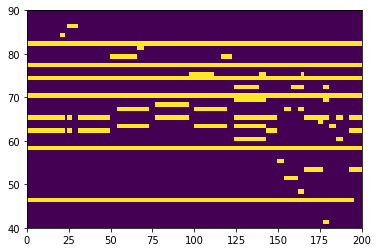

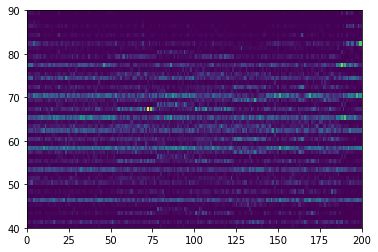

In [24]:
pXs = data[0]["X"][:200]
pYs_exp = data[0]["Y"][:200]
pYs_act = agent.model.predict_on_batch(pXs)
# pYs_exp = Ys[:500]
import IPython.display as ipd
cpXs = np.concatenate(pXs,0)
ipd.Audio(cpXs,rate=16000)
compare()

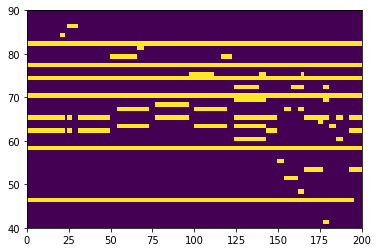

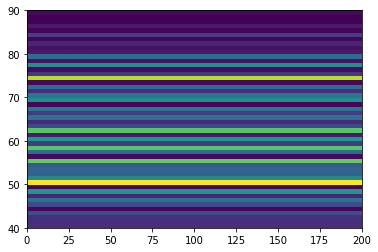

In [87]:
pXs = data[0]["X"][-200:]
pXs = -pXs
pYs_exp = data[0]["Y"][-200:]

pXs = data[0]["X"][:500]
pXs = -pXs
pYs_exp = data[0]["Y"][:500]

pYs_act = agent.model.predict_on_batch(pXs)
# pYs_exp = Ys[:500]
import IPython.display as ipd
cpXs = np.concatenate(pXs,0)

compare()

In [43]:
np.mean(cpXs**2)

0.99999999999999967

In [53]:
print pXs.shape
np.mean(pXs**2,axis = 1 ).shape

(200, 800)


(200,)

In [72]:
ipd.Audio(cpXs,rate=16000)

In [94]:
def norm_by_rmsq(pXs):
    OUT = pXs/np.sqrt(np.mean(pXs**2,axis = 1,keepdims=1))
#     OUT = np.nan_to_num(OUT)
    return OUT

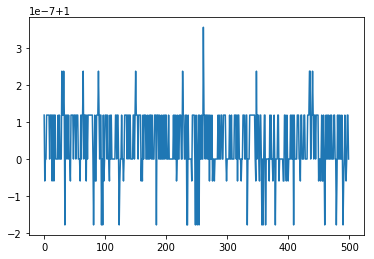

In [91]:
# npXs = np.nan_to_num( pXs/np.sqrt(np.mean(pXs**2,axis = 1,keepdims=1)))
npXs = ( pXs/np.sqrt(np.mean(pXs**2,axis = 1,keepdims=1)))
eng = np.mean(npXs**2,axis = 1)
plt.plot(eng)

In [89]:
cnpXs = np.concatenate(npXs,0)
ipd.Audio(cnpXs,rate= 16000)

In [90]:
cpXs = np.concatenate(pXs,0)
ipd.Audio(cpXs,rate= 16000)

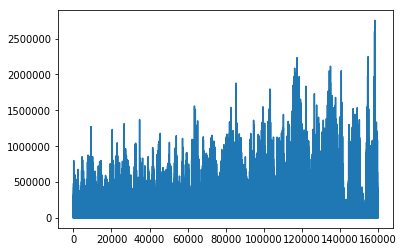

In [76]:
cpXs = cpXs/np.sqrt(np.mean(cpXs**2))

cpXs_energy = (cpXs ** 2)
plt.plot(cpXs_energy)

In [24]:
pYs_act

array([[  1.06656898e-06,   1.38493751e-05,   3.56604555e-03, ...,
          1.50671491e-04,   1.89737906e-03,   9.06542555e-05],
       [  8.60511662e-08,   1.11140245e-07,   2.03496631e-04, ...,
          1.27527412e-04,   7.79804031e-05,   2.74471786e-05],
       [  1.58119864e-08,   5.94019548e-06,   2.39075176e-04, ...,
          8.47503368e-04,   5.34209714e-04,   1.82511269e-06],
       ..., 
       [  7.53767188e-11,   1.34760461e-08,   7.55304354e-05, ...,
          4.38121589e-07,   5.44218324e-07,   2.56833459e-06],
       [  7.04198158e-08,   4.58901563e-11,   1.06562837e-03, ...,
          1.67121441e-04,   2.75144248e-05,   1.07303549e-06],
       [  2.07827262e-11,   8.38782429e-12,   1.85748431e-05, ...,
          1.33716853e-07,   2.72536653e-07,   1.17504921e-08]], dtype=float32)

In [53]:
?mir_eval.sonify.time_frequency

In [54]:
 pYs_exp.shape

(200, 128)

In [27]:
# cpXs/np.std(cpXs)
np.mean(cpXs**2)

264.50692500000002

In [47]:
ipd.Audio( -cpXs  ,rate = 16000)
# ipd.Audio( -cpXs/np.mean(cpXs**2)  ,rate = 16000)


In [75]:
import mir_eval
freqs = mir_eval.transcription.util.midi_to_hz(np.arange(128))
Xs_exp = mir_eval.sonify.time_frequency( pYs_exp.T,freqs,times = 1./20*np.arange(len(pXs)),fs = 16000)
Xs_exp = np.hstack([Xs_exp,[0]*(len(cpXs)-len(Xs_exp))])
ipd.Audio( cpXs/np.std(cpXs) + 2*Xs_exp/np.std(Xs_exp) ,rate = 16000)


In [43]:
pYs_exp.shape

(200, 128)

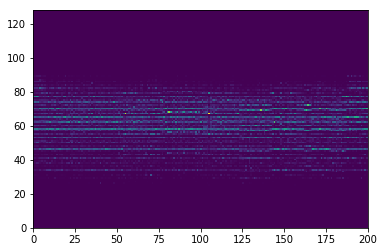

In [70]:

plt.pcolormesh((pYs_act.T))
# plt.gca().set_xlim(300,500)
# plt.gca().set_ylim(40,90)

In [143]:
import matplotlib.pyplot as plt
def plot_model_loss(res):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
import matplotlib.pyplot as plt
history = res
print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'res' is not defined

In [86]:
for x in range(100):
    idx = np.random.randint(0,len(Xs),100)
    subXs = Xs[idx]
    # subYs = Ys[None,idx]
    subYs = Ys[idx]
    loss = agent.model.train_on_batch(subXs,subYs)

65.066399

In [ ]:
keras.layers.convolutional.C

In [23]:
agent = PGAgent(16000/20, 128)
# agent.summary()
agent.load('cache.agent')

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(40, (5,), padding="valid", kernel_initializer="he_uniform", activation="relu")`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(30, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.p

In [22]:
agent = PGAgent(16000/20, 128)
agent.summary()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(40, (5,), padding="valid", kernel_initializer="he_uniform", activation="relu")`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(30, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, (5,), kernel_initializer="he_uniform", activation="relu", padding="valid", strides=3)`
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 800, 1)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800, 1)            3200      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 796, 40)           240       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 264, 30)           6030      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 87, 20)            3020      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 28, 20)            2020      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 8, 20)             2020      
__________

In [21]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential,load_model
# from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
# from keras.layers.convolutional import Convolution2D

from keras.layers import *
from keras.layers.convolutional import *
class PGAgent:
    def __init__(self, state_size, action_size,AgentName = 'tst'):
#         self.AgentName = 'pong_minimal-s5L1b-tst'
        self.name = AgentName
        self.AgentFile = 'Models/%s.h5'%AgentName;
        self.LogName = 'Models/%s.log'%AgentName;
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.99
        self.learning_rate = 0.001
        self.states = []
        self.gradients = []
        self.rewards = []
        self.probs = []
        self.model = self._build_model()
        self.summary = self.model.summary;

    def _build_model(self):
        model = Sequential()
#         model.add(Reshape((80, 80, 1), input_shape=(self.state_size,)))
        model.add(Reshape((self.state_size,1), input_shape=(self.state_size,)))
#         model.add(Reshape(self.state_size, input_shape=(self.state_size,)))
        model.add(BatchNormalization(axis = 1))
        model.add(Conv1D(40, (5,), 
#                          subsample=(3,),
#                          border_mode='same',
                         border_mode='valid',
                                activation='relu', init='he_uniform'))
        model.add(Conv1D(30, (5, ), strides=3,
#                          subsample=(1, 1),
#                          border_mode='same',
                         border_mode='valid',
                                activation='relu', init='he_uniform'))
        model.add(Conv1D(20, (5, ), strides=3,
#                          subsample=(1, 1), 
#                          border_mode='same',
                         border_mode='valid',
                                activation='relu', init='he_uniform'))
        model.add(Conv1D(20, (5, ), strides=3,
#                          subsample=(1, 1),
#                          border_mode='same',
                         border_mode='valid',
                                activation='relu', init='he_uniform'))
        model.add(Conv1D(20, (5, ), strides=3,
#                          subsample=(1, 1),
#                          border_mode='same',
                         border_mode='valid',
                                activation='relu', init='he_uniform'))
#         model.add(Convolution2D(25, (6, 6), subsample=(3, 3), border_mode='same',
#                                 activation='relu', init='he_uniform'))
#         model.add(Convolution2D(5, (6, 6), subsample=(1, 1), border_mode='same',
#                                 activation='relu', init='he_uniform'))
#         model.add(Convolution2D(5, (6, 6), subsample=(1, 1), border_mode='same',
#                                 activation='relu', init='he_uniform'))
#         model.add(Convolution2D(5, (6, 6), subsample=(1, 1), border_mode='same',
#                                 activation='relu', init='he_uniform'))
        model.add(Flatten())
#         model.add(Dense(20, activation='relu', init='he_uniform'))
#         model.add(Dense(20, activation='relu', init='he_uniform'))
        model.add( Dense(self.action_size, activation='softmax'))
    
        opt = Adam(lr=self.learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=opt)
        return model

    def remember(self, state, action, prob, reward):
        y = np.zeros([self.action_size])
        y[action] = 1
        self.gradients.append(np.array(y).astype('float32') - prob)
        self.states.append(state)
        self.rewards.append(reward)

    def act(self, state):
        # state = state.reshape([1, state.shape[0]])
        aprob = self.model.predict(state, batch_size=1).flatten()
        self.probs.append(aprob)
        prob = aprob / np.sum(aprob)
        action = np.random.choice(self.action_size, 1, p=prob)[0]
        return action, prob

    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, rewards.size)):
            if rewards[t] != 0:
                running_add = 0
            running_add = running_add * self.gamma + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    def train(self,rewards,batch_size = 2000,verbose = 0):
        gradients = np.vstack(self.gradients)
        # rewards = np.vstack(self.rewards)
        # rewards = self.discount_rewards(rewards)
        rewards = (rewards - np.mean(rewards,keepdims=1)) / np.std(rewards)
        gradients *= rewards
        X = np.squeeze(np.vstack([self.states]))
        Y = self.probs + self.learning_rate * np.squeeze(np.vstack([gradients]))
#         print(X.shape)
#         self.model.train_on_batch(X, Y)
#         X = np.expand_dims(X,axis = 1)
#         Y = np.expand_dims(Y,axis = 1)
    
#         gen = ((X[i],Y[i]) for i in range(len(X)));
#         zipped = zip(X,Y)
        Xgen = chunks(X,batch_size);
        Ygen = chunks(Y,batch_size);
        gen = (x for x in zip(Xgen,Ygen))
#         gen1 = ((x,y) for x,y in zip(chunks(X,batch_size).next(),chunks(Y,batch_size).next()))
#         print(gen1.next()[1].shape)
#         print(chunks(X,batch_size).next().shape)
#         print()
        bmax = max(X.shape[0]//batch_size,1)
#         print(gen)
#         print(bmax)
        try:
            self.model.fit_generator(gen, steps_per_epoch = bmax, epochs = 1,verbose = verbose, max_q_size=1)
        except StopIteration:
            pass
#         self.model.fit(X,Y,  epochs = 1,verbose = verbose)
    
        self.states, self.probs, self.gradients, self.rewards = [], [], [], []

    def load(self, fname=None):
        if not fname:
            fname = self.AgentFile;
        global episode
        self.model = load_model(fname);
        self.summary = self.model.summary;
        
    def readlog(self, LogName=None):
        if not LogName:
            LogName = self.LogName;
        with open(LogName,'rb') as f:
                first = f.readline()      # Read the first line.
                if not first.rstrip('\n'):
#                     print('nothing!')
                    self.episode = 0;
                else:
                    f.seek(-2, 2)             # Jump to the second last byte.
                    while f.read(1) != b"\n": # Until EOL is found...
                        f.seek(-2, 1)         # ...jump back the read byte plus one more.
                    last = f.readline() 
                    lst = last.split('\t');
                    eind = lst.index('Episode')+1;
                    self.episode = int(lst[eind]);

    def save(self, fname=None):
        if not fname:
            fname = self.AgentFile;
        self.model.save(fname);
    def writelog(self, msg, LogName = None):
        if not LogName:
            LogName = self.LogName
        with open(LogName,'a+') as LogFile:
            LogFile.write(msg+'\n');
    def newlog(self):
        open(self.LogName,'w').close();